In [177]:
import numpy as np
import pandas as pd
import re

In [178]:
# pd.set_option('display.max_colwidth', None)
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)

In [179]:
df = pd.read_csv('gurgaon_properties_cleaned_v1.csv')

In [180]:
df.duplicated().sum()

np.int64(122)

In [248]:
df.head(1)
# focus is on -> areaWithType, additionalRoom, agePossession, furnishDetails, features 

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,experion the heartsong,sector 108,1.6,7988.0,2003.0,Super Built up area 2003(186.08 sq.m.)Built Up area: 1500.29 sq.ft. (139.38 sq.m.)Carpet area: 1140.98 sq.ft. (106 sq.m.),3,4,3+,3.0,South,Relatively New,2003.0,1500.29,1140.98,0,1,0,0,0,1,60


## 1. areaWithType

In [182]:
df.sample(5)[['price','area','areaWithType']]

,price,area,areaWithType
3548,2.20,3434.0,Super Built up area 3434(319.03 sq.m.)
2099,1.80,823.0,Plot area 900(83.61 sq.m.)Built Up area: 800 sq.ft. (74.32 sq.m.)Carpet area: 720 sq.ft. (66.89 sq.m.)
188,0.70,1260.0,Built Up area: 140 (117.06 sq.m.)
1024,13.20,4861.0,Built Up area: 4861 (451.6 sq.m.)
4,1.35,1400.0,Super Built up area 1918(178.19 sq.m.)Built Up area: 1750 sq.ft. (162.58 sq.m.)Carpet area: 1400 sq.ft. (130.06 sq.m.)


In [183]:
# This function extracts the Super Built up area
def get_super_built_up_area(text):
    match = re.search(r'Super Built up area (\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

In [184]:
# This function extracts the Built Up area or Carpet area
def get_area(text, area_type):
    match = re.search(area_type + r'\s*:\s*(\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

In [185]:
# This function checks if the area is provided in sq.m. and converts it to sqft if needed
def convert_to_sqft(text, area_value):
    if area_value is None:
        return None
    match = re.search(r'{} \((\d+\.?\d*) sq.m.\)'.format(area_value), text)
    if match:
        sq_m_value = float(match.group(1))
        return sq_m_value * 10.7639  # conversion factor from sq.m. to sqft
    return area_value

In [186]:
# Extract Super Built up area and convert to sqft if needed
df['super_built_up_area'] = df['areaWithType'].apply(get_super_built_up_area)
df['super_built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['super_built_up_area']), axis=1)

# Extract Built Up area and convert to sqft if needed
df['built_up_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Built Up area'))
df['built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['built_up_area']), axis=1)

# Extract Carpet area and convert to sqft if needed
df['carpet_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Carpet area'))
df['carpet_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['carpet_area']), axis=1)

In [187]:
df[['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].sample(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
2398,2.50,flat,1838.0,Super Built up area 1828(169.83 sq.m.),1828.0,NaN,NaN
2710,1.21,flat,1943.0,Super Built up area 1943(180.51 sq.m.)Carpet area: 1500 sq.ft. (139.35 sq.m.),1943.0,NaN,1500.0
2291,2.70,house,1450.0,Plot area 1450(134.71 sq.m.),NaN,NaN,NaN
2135,0.25,flat,481.0,Built Up area: 481 (44.69 sq.m.),NaN,481.0,NaN
3005,1.55,flat,1330.0,Super Built up area 1330(123.56 sq.m.)Built Up area: 1276 sq.ft. (118.54 sq.m.)Carpet area: 1180 sq.ft. (109.63 sq.m.),1330.0,1276.0,1180.0


In [188]:
df.duplicated().sum()

np.int64(122)

In [189]:
df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].shape

(534, 7)

In [190]:
df[df['areaWithType'].str.contains('Plot')][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].head(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
8,1.27,house,1570.0,Plot area 1570(145.86 sq.m.),NaN,NaN,NaN
9,2.00,house,1440.0,Plot area 160(133.78 sq.m.),NaN,NaN,NaN
14,6.25,house,5400.0,Plot area 600(501.68 sq.m.),NaN,NaN,NaN
16,10.50,house,402.0,Plot area 402(37.35 sq.m.),NaN,NaN,NaN
19,4.99,house,2642.0,Plot area 270(225.75 sq.m.),NaN,NaN,NaN


In [191]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                    18
price_per_sqft           18
area                     18
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
additionalRoom            0
floorNum                 19
facing                 1105
agePossession             1
nearbyLocations         177
furnishDetails          981
features                635
super_built_up_area    1888
built_up_area          2616
carpet_area            1859
dtype: int64

In [192]:
all_nan_df = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']]

In [193]:
all_nan_df.head()

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
8,1.27,house,1570.0,Plot area 1570(145.86 sq.m.),NaN,NaN,NaN
9,2.00,house,1440.0,Plot area 160(133.78 sq.m.),NaN,NaN,NaN
14,6.25,house,5400.0,Plot area 600(501.68 sq.m.),NaN,NaN,NaN
16,10.50,house,402.0,Plot area 402(37.35 sq.m.),NaN,NaN,NaN
19,4.99,house,2642.0,Plot area 270(225.75 sq.m.),NaN,NaN,NaN


In [194]:
all_nan_index = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].index

In [195]:
# Function to extract plot area from 'areaWithType' column
def extract_plot_area(area_with_type):
    match = re.search(r'Plot area (\d+\.?\d*)', area_with_type)
    return float(match.group(1)) if match else None

In [196]:
all_nan_df['built_up_area'] = all_nan_df['areaWithType'].apply(extract_plot_area)

# Update the original dataframe
#gurgaon_properties.update(filtered_rows)

In [197]:
all_nan_df

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
8,1.27,house,1570.0,Plot area 1570(145.86 sq.m.),NaN,1570.00,NaN
9,2.00,house,1440.0,Plot area 160(133.78 sq.m.),NaN,160.00,NaN
14,6.25,house,5400.0,Plot area 600(501.68 sq.m.),NaN,600.00,NaN
16,10.50,house,402.0,Plot area 402(37.35 sq.m.),NaN,402.00,NaN
19,4.99,house,2642.0,Plot area 270(225.75 sq.m.),NaN,270.00,NaN
20,6.50,house,1800.0,Plot area 200(167.23 sq.m.),NaN,200.00,NaN
28,17.00,house,4518.0,Plot area 502(419.74 sq.m.),NaN,502.00,NaN
33,8.50,house,4000.0,Plot area 4000(371.61 sq.m.),NaN,4000.00,NaN
48,2.10,house,1215.0,Plot area 135(112.88 sq.m.),NaN,135.00,NaN
54,11.75,house,5056.0,Plot area 502(419.74 sq.m.),NaN,502.00,NaN


In [198]:
def convert_scale(row):
    if np.isnan(row['area']) or np.isnan(row['built_up_area']):
        return row['built_up_area']
    else:
        if round(row['area']/row['built_up_area']) == 9.0:
            return row['built_up_area'] * 9
        elif round(row['area']/row['built_up_area']) == 11.0:
            return row['built_up_area'] * 10.7
        else:
            return row['built_up_area']

In [199]:
all_nan_df['built_up_area'] = all_nan_df.apply(convert_scale,axis=1)

In [200]:
all_nan_df

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
8,1.27,house,1570.0,Plot area 1570(145.86 sq.m.),NaN,1570.00,NaN
9,2.00,house,1440.0,Plot area 160(133.78 sq.m.),NaN,1440.00,NaN
14,6.25,house,5400.0,Plot area 600(501.68 sq.m.),NaN,5400.00,NaN
16,10.50,house,402.0,Plot area 402(37.35 sq.m.),NaN,402.00,NaN
19,4.99,house,2642.0,Plot area 270(225.75 sq.m.),NaN,270.00,NaN
20,6.50,house,1800.0,Plot area 200(167.23 sq.m.),NaN,1800.00,NaN
28,17.00,house,4518.0,Plot area 502(419.74 sq.m.),NaN,4518.00,NaN
33,8.50,house,4000.0,Plot area 4000(371.61 sq.m.),NaN,4000.00,NaN
48,2.10,house,1215.0,Plot area 135(112.88 sq.m.),NaN,1215.00,NaN
54,11.75,house,5056.0,Plot area 502(419.74 sq.m.),NaN,502.00,NaN


In [201]:
# update the original dataframe
df.update(all_nan_df)

In [202]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                    18
price_per_sqft           18
area                     18
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
additionalRoom            0
floorNum                 19
facing                 1105
agePossession             1
nearbyLocations         177
furnishDetails          981
features                635
super_built_up_area    1888
built_up_area          2070
carpet_area            1859
dtype: int64

In [203]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area
0,flat,experion the heartsong,sector 108,1.60,7988.0,2003.0,Super Built up area 2003(186.08 sq.m.)Built Up area: 1500.29 sq.ft. (139.38 sq.m.)Carpet area: 1140.98 sq.ft. (106 sq.m.),3,4,3+,servant room,3.0,South,1 to 5 Year Old,"['Galleria 108 Mall', 'Dwarka Expressway', 'Central Peripheral Road', 'The Shikshiyan School', 'Manipal Hospital', 'Indira Gandhi International Airport', 'Vivanta New Delhi, Dwarka', 'SkyJumper Trampoline Park', 'Fun N Food Village']","['1 Wardrobe', '3 Fan', '1 Exhaust Fan', '3 Geyser', '3 Light', '4 AC', '1 Modular Kitchen', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Lift(s)', 'Maintenance Staff', 'Swimming Pool', 'Water Storage', 'Park', 'Visitor Parking', 'Fitness Centre / GYM', 'Club house / Community Center', 'Rain Water Harvesting']",2003.0,1500.29,1140.98
1,flat,emaar gurgaon greens,sector 102,1.55,9393.0,1650.0,Super Built up area 1650(153.29 sq.m.)Carpet area: 1022.58 sq.ft. (95 sq.m.),3,4,3,servant room,7.0,North,1 to 5 Year Old,"['JMS Marine Square Mall', 'Dwarka Expressway', 'Basai Road', 'Prime Scholars Int. School', 'DPG Institute of Technology', 'Vibrant Hospital', 'Indira Gandhi International Airport', 'IMT Manesar', 'SkyJumper Trampoline Park', 'Ramgarh Farms & Resort']","['5 Fan', '1 Exhaust Fan', '10 Light', '5 AC', '1 Modular Kitchen', '1 Chimney', 'No Bed', 'No Curtains', 'No Dining Table', 'No Geyser', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Centrally Air Conditioned', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']",1650.0,NaN,1022.58
2,flat,sobha city,sector 108,3.75,14938.0,2510.0,Super Built up area 2343(217.67 sq.m.),3,3,2,servant room,16.0,North-East,0 to 1 Year Old,"['Dwarka Sector 21', 'Dwarka Expressway', 'Vasant Kunj', 'The Shikshiyan School', 'The NorthCap University', 'Rions Hospital', 'IGI Airport', 'Gurgaon', 'WTC Plaza', 'Luxus Haritma Resort', 'Fun N Food WaterPark', 'BSF Golf Course', 'Nehru Stadium']","['1 Fan', '1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Intercom Facility', 'Lift(s)', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Low Density Society', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']",2343.0,NaN,NaN
3,flat,tulip violet,sector 69,1.28,8111.0,1578.0,Super Built up area 1578(146.6 sq.m.),3,3,2,pooja room,12.0,South-West,1 to 5 Year Old,"['Airia Mall Sector 68', 'Southern Peripheral Road', 'Golf Course Extension Rd', 'Imperio School', 'DPG Institute of Technology', 'Ektaa Hospitals', 'Indira Gandhi International Airport', 'Vipul Trade Business Centre', 'Radisson Hotel Gurugram', 'SkyJumper Trampoline Park']","['3 Wardrobe', '4 Fan', '1 Exhaust Fan', '3 Geyser', '7 Light', '1 Modular Kitchen', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Mi

## 2.additionalRoom

In [204]:
df['additionalRoom'].value_counts()

additionalRoom
not available                                    1587
servant room                                      705
study room                                        250
others                                            225
pooja room                                        165
store room                                         99
study room,servant room                            99
pooja room,servant room                            82
pooja room,study room,servant room,store room      72
servant room,others                                60
pooja room,study room,servant room                 55
pooja room,study room,servant room,others          54
servant room,pooja room                            38
servant room,store room                            33
study room,others                                  29
pooja room,study room                              22
pooja room,others                                  17
pooja room,store room                              15
pooja room,st

In [205]:
# additional room
# List of new columns to be created
new_cols = ['study room', 'servant room', 'store room', 'pooja room', 'others']

# Populate the new columns based on the "additionalRoom" column
for col in new_cols:
    df[col] = df['additionalRoom'].str.contains(col).astype(int)

In [206]:
df.sample(5)[['additionalRoom','study room', 'servant room', 'store room', 'pooja room', 'others']]

,additionalRoom,study room,servant room,store room,pooja room,others
3405,not available,0,0,0,0,0
1338,servant room,0,1,0,0,0
1553,not available,0,0,0,0,0
2715,"servant room,pooja room,store room",0,1,1,1,0
2313,not available,0,0,0,0,0


In [207]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others
0,flat,experion the heartsong,sector 108,1.60,7988.0,2003.0,Super Built up area 2003(186.08 sq.m.)Built Up area: 1500.29 sq.ft. (139.38 sq.m.)Carpet area: 1140.98 sq.ft. (106 sq.m.),3,4,3+,servant room,3.0,South,1 to 5 Year Old,"['Galleria 108 Mall', 'Dwarka Expressway', 'Central Peripheral Road', 'The Shikshiyan School', 'Manipal Hospital', 'Indira Gandhi International Airport', 'Vivanta New Delhi, Dwarka', 'SkyJumper Trampoline Park', 'Fun N Food Village']","['1 Wardrobe', '3 Fan', '1 Exhaust Fan', '3 Geyser', '3 Light', '4 AC', '1 Modular Kitchen', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Lift(s)', 'Maintenance Staff', 'Swimming Pool', 'Water Storage', 'Park', 'Visitor Parking', 'Fitness Centre / GYM', 'Club house / Community Center', 'Rain Water Harvesting']",2003.0,1500.29,1140.98,0,1,0,0,0
1,flat,emaar gurgaon greens,sector 102,1.55,9393.0,1650.0,Super Built up area 1650(153.29 sq.m.)Carpet area: 1022.58 sq.ft. (95 sq.m.),3,4,3,servant room,7.0,North,1 to 5 Year Old,"['JMS Marine Square Mall', 'Dwarka Expressway', 'Basai Road', 'Prime Scholars Int. School', 'DPG Institute of Technology', 'Vibrant Hospital', 'Indira Gandhi International Airport', 'IMT Manesar', 'SkyJumper Trampoline Park', 'Ramgarh Farms & Resort']","['5 Fan', '1 Exhaust Fan', '10 Light', '5 AC', '1 Modular Kitchen', '1 Chimney', 'No Bed', 'No Curtains', 'No Dining Table', 'No Geyser', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Centrally Air Conditioned', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']",1650.0,NaN,1022.58,0,1,0,0,0
2,flat,sobha city,sector 108,3.75,14938.0,2510.0,Super Built up area 2343(217.67 sq.m.),3,3,2,servant room,16.0,North-East,0 to 1 Year Old,"['Dwarka Sector 21', 'Dwarka Expressway', 'Vasant Kunj', 'The Shikshiyan School', 'The NorthCap University', 'Rions Hospital', 'IGI Airport', 'Gurgaon', 'WTC Plaza', 'Luxus Haritma Resort', 'Fun N Food WaterPark', 'BSF Golf Course', 'Nehru Stadium']","['1 Fan', '1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Intercom Facility', 'Lift(s)', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Low Density Society', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']",2343.0,NaN,NaN,0,1,0,0,0
3,flat,tulip violet,sector 69,1.28,8111.0,1578.0,Super Built up area 1578(146.6 sq.m.),3,3,2,pooja room,12.0,South-West,1 to 5 Year Old,"['Airia Mall Sector 68', 'Southern Peripheral Road', 'Golf Course Extension Rd', 'Imperio School', 'DPG Institute of Technology', 'Ektaa Hospitals', 'Indira Gandhi International Airport', 'Vipul Trade Business Centre', 'Radisson Hotel Gurugram', 'SkyJumper Trampoline Park']","['3 Wardrobe', '4 Fan', '1 Exhaust Fan', '3 Geyser', '7 Light', '1 Modular 

## 3.agePossession

In [208]:
df['agePossession'].value_counts()

agePossession
1 to 5 Year Old       1676
5 to 10 Year Old       575
0 to 1 Year Old        530
undefined              332
10+ Year Old           310
Under Construction      90
Within 6 months         70
Within 3 months         26
Dec 2023                22
By 2023                 19
By 2024                 17
Dec 2024                16
Mar 2024                14
Oct 2024                 8
Jan 2024                 8
Jun 2024                 7
Dec 2025                 7
Aug 2023                 7
Nov 2023                 5
Oct 2023                 4
Jul 2024                 4
Aug 2024                 4
By 2025                  4
Sep 2023                 4
Feb 2024                 3
May 2024                 3
Jan 2025                 3
Nov 2024                 3
Aug 2025                 2
By 2027                  2
Jul 2027                 2
Dec 2026                 2
Jan 2026                 2
Apr 2026                 2
Jul 2025                 2
Jun 2027                 2
Mar 2025      

In [209]:
def categorize_age_possession(value):
    if pd.isna(value):
        return "Undefined"
    if "0 to 1 Year Old" in value or "Within 6 months" in value or "Within 3 months" in value:
        return "New Property"
    if "1 to 5 Year Old" in value:
        return "Relatively New"
    if "5 to 10 Year Old" in value:
        return "Moderately Old"
    if "10+ Year Old" in value:
        return "Old Property"
    if "Under Construction" in value or "By" in value:
        return "Under Construction"
    try:
        # For entries like 'May 2024'
        int(value.split(" ")[-1])
        return "Under Construction"
    except:
        return "Undefined"

In [210]:
df['agePossession'] = df['agePossession'].apply(categorize_age_possession)

In [211]:
df['agePossession'].value_counts()

agePossession
Relatively New        1676
New Property           626
Moderately Old         575
Undefined              333
Old Property           310
Under Construction     283
Name: count, dtype: int64

In [212]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others
0,flat,experion the heartsong,sector 108,1.60,7988.0,2003.0,Super Built up area 2003(186.08 sq.m.)Built Up area: 1500.29 sq.ft. (139.38 sq.m.)Carpet area: 1140.98 sq.ft. (106 sq.m.),3,4,3+,servant room,3.0,South,Relatively New,"['Galleria 108 Mall', 'Dwarka Expressway', 'Central Peripheral Road', 'The Shikshiyan School', 'Manipal Hospital', 'Indira Gandhi International Airport', 'Vivanta New Delhi, Dwarka', 'SkyJumper Trampoline Park', 'Fun N Food Village']","['1 Wardrobe', '3 Fan', '1 Exhaust Fan', '3 Geyser', '3 Light', '4 AC', '1 Modular Kitchen', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Lift(s)', 'Maintenance Staff', 'Swimming Pool', 'Water Storage', 'Park', 'Visitor Parking', 'Fitness Centre / GYM', 'Club house / Community Center', 'Rain Water Harvesting']",2003.0,1500.29,1140.98,0,1,0,0,0
1,flat,emaar gurgaon greens,sector 102,1.55,9393.0,1650.0,Super Built up area 1650(153.29 sq.m.)Carpet area: 1022.58 sq.ft. (95 sq.m.),3,4,3,servant room,7.0,North,Relatively New,"['JMS Marine Square Mall', 'Dwarka Expressway', 'Basai Road', 'Prime Scholars Int. School', 'DPG Institute of Technology', 'Vibrant Hospital', 'Indira Gandhi International Airport', 'IMT Manesar', 'SkyJumper Trampoline Park', 'Ramgarh Farms & Resort']","['5 Fan', '1 Exhaust Fan', '10 Light', '5 AC', '1 Modular Kitchen', '1 Chimney', 'No Bed', 'No Curtains', 'No Dining Table', 'No Geyser', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Centrally Air Conditioned', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']",1650.0,NaN,1022.58,0,1,0,0,0
2,flat,sobha city,sector 108,3.75,14938.0,2510.0,Super Built up area 2343(217.67 sq.m.),3,3,2,servant room,16.0,North-East,New Property,"['Dwarka Sector 21', 'Dwarka Expressway', 'Vasant Kunj', 'The Shikshiyan School', 'The NorthCap University', 'Rions Hospital', 'IGI Airport', 'Gurgaon', 'WTC Plaza', 'Luxus Haritma Resort', 'Fun N Food WaterPark', 'BSF Golf Course', 'Nehru Stadium']","['1 Fan', '1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Intercom Facility', 'Lift(s)', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Low Density Society', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']",2343.0,NaN,NaN,0,1,0,0,0
3,flat,tulip violet,sector 69,1.28,8111.0,1578.0,Super Built up area 1578(146.6 sq.m.),3,3,2,pooja room,12.0,South-West,Relatively New,"['Airia Mall Sector 68', 'Southern Peripheral Road', 'Golf Course Extension Rd', 'Imperio School', 'DPG Institute of Technology', 'Ektaa Hospitals', 'Indira Gandhi International Airport', 'Vipul Trade Business Centre', 'Radisson Hotel Gurugram', 'SkyJumper Trampoline Park']","['3 Wardrobe', '4 Fan', '1 Exhaust Fan', '3 Geyser', '7 Light', '1 Modular Kitche

## 4.furnishDetails

In [213]:
df.sample(5)[['furnishDetails','features']]

,furnishDetails,features
1771,"['5 AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Centrally Air Conditioned', 'Maintenance Staff', 'Water Storage', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Fitness Centre / GYM', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']"
2110,"['1 Stove', '1 Chimney', '4 AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'Water Storage', 'No open drainage around', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']"
1868,NaN,"['Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Visitor Parking', 'Swimming Pool', 'Park', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']"
554,NaN,"['Feng Shui / Vaastu Compliant', 'High Ceiling Height', 'Separate entry for servant room', 'Park', 'Visitor Parking', 'Natural Light', 'Airy Rooms']"
2586,"['1 Wardrobe', '3 Fan', '3 Light', '2 Curtains', 'No AC', 'No Bed', 'No Chimney', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Park', 'Visitor Parking']"


In [214]:
# Extract all unique furnishings from the furnishDetails column
all_furnishings = []
for detail in df['furnishDetails'].dropna():
    furnishings = detail.replace('[', '').replace(']', '').replace("'", "").split(', ')
    all_furnishings.extend(furnishings)
unique_furnishings = list(set(all_furnishings))

# Define a function to extract the count of a furnishing from the furnishDetails
def get_furnishing_count(details, furnishing):
    if isinstance(details, str):
        if f"No {furnishing}" in details:
            return 0
        pattern = re.compile(f"(\d+) {furnishing}")
        match = pattern.search(details)
        if match:
            return int(match.group(1))
        elif furnishing in details:
            return 1
    return 0

# Simplify the furnishings list by removing "No" prefix and numbers
columns_to_include = [re.sub(r'No |\d+', '', furnishing).strip() for furnishing in unique_furnishings]
columns_to_include = list(set(columns_to_include))  # Get unique furnishings
columns_to_include = [furnishing for furnishing in columns_to_include if furnishing]  # Remove empty strings

# Create new columns for each unique furnishing and populate with counts
for furnishing in columns_to_include:
    df[furnishing] = df['furnishDetails'].apply(lambda x: get_furnishing_count(x, furnishing))

# Create the new dataframe with the required columns
furnishings_df = df[['furnishDetails'] + columns_to_include]


<>:13: SyntaxWarning: invalid escape sequence '\d'
<>:13: SyntaxWarning: invalid escape sequence '\d'
C:\Users\MI Computer\AppData\Local\Temp\ipykernel_3328\2118040236.py:13: SyntaxWarning: invalid escape sequence '\d'
  pattern = re.compile(f"(\d+) {furnishing}")


In [215]:
furnishings_df.shape

(3803, 19)

In [216]:
furnishings_df.drop(columns=['furnishDetails'],inplace=True)

C:\Users\MI Computer\AppData\Local\Temp\ipykernel_3328\114705885.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  furnishings_df.drop(columns=['furnishDetails'],inplace=True)


In [217]:
furnishings_df.sample(5)

,TV,Dining Table,Wardrobe,Geyser,Stove,AC,Curtains,Water Purifier,Modular Kitchen,Bed,Exhaust Fan,Microwave,Washing Machine,Sofa,Fan,Fridge,Light,Chimney
2349,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2487,0,0,5,3,0,0,1,0,1,0,1,0,0,0,7,0,8,0
1488,0,0,3,3,0,5,0,0,1,0,0,0,0,0,6,0,15,1
330,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2462,0,0,2,0,0,0,0,0,1,0,0,0,0,0,0,0,8,0


In [218]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [219]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(furnishings_df)

In [220]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss_reduced.append(kmeans.inertia_)

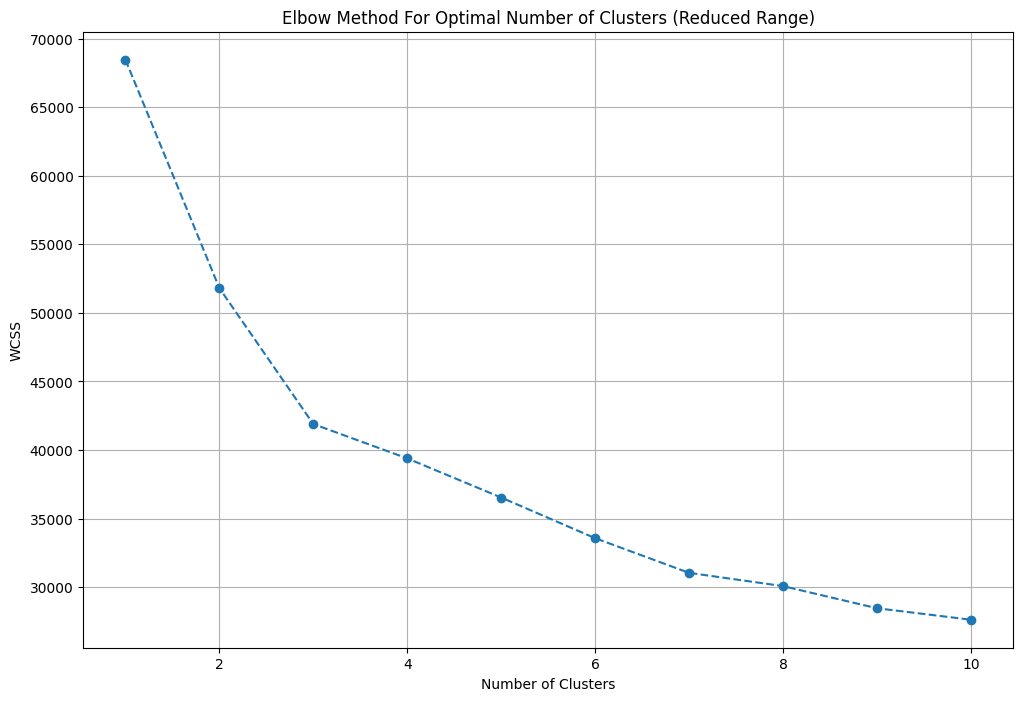

In [221]:
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [222]:
n_clusters = 3

# Fit the KMeans model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(scaled_data)

# Predict the cluster assignments for each row
cluster_assignments = kmeans.predict(scaled_data)

In [223]:
df = df.iloc[:,:-18]

In [224]:
df['furnishing_type'] = cluster_assignments

In [225]:
df.sample(5)[['furnishDetails','furnishing_type']]
# 0 -> unfurnished
# 1 -> semifurnished
# 2 -> furnished

,furnishDetails,furnishing_type
2201,NaN,0
645,NaN,0
2896,NaN,0
3368,[],0
2928,"['1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",0


## 5.features

In [226]:
df[['society','features']].sample(5)

,society,features
2738,raheja teachers apartments,"['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'Centrally Air Conditioned', 'Water purifier', 'Maintenance Staff', 'Water Storage', 'Bank Attached Property', 'Piped-gas', 'Visitor Parking', 'Park', 'Security Personnel', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Natural Light', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']"
1035,the close north,"['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']"
1433,independent,"['Feng Shui / Vaastu Compliant', 'Park', 'Visitor Parking', 'Low Density Society']"
2753,ss the leaf,"['Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Internet/wi-fi connectivity', 'Shopping Centre', 'Fitness Centre / GYM', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']"
3069,samadhan shri kamal cghs,NaN


In [227]:
df['features'].isnull().sum()

np.int64(635)

In [228]:
import pandas as pd
app_df = pd.read_csv('appartments.csv')
app_df.head(2)

,PropertyName,PropertySubName,NearbyLocations,LocationAdvantages,Link,PriceDetails,TopFacilities
0,Smartworld One DXP,"2, 3, 4 BHK Apartment in Sector 113, Gurgaon","['Bajghera Road', 'Palam Vihar Halt', 'DPSG Palam Vihar', 'Park Hospital', 'Gurgaon Railway Station']","{'Bajghera Road': '800 Meter', 'Palam Vihar Halt': '2.5 KM', 'DPSG Palam Vihar': '3.1 KM', 'Park Hospital': '3.1 KM', 'Gurgaon Railway Station': '4.9 KM', 'The NorthCap University': '5.4 KM', 'Dwarka Expy': '1.2 KM', 'Hyatt Place Gurgaon Udyog Vihar': '7.7 KM', 'Dwarka Sector 21, Metro Station': '7.2 KM', 'Pacific D21 Mall': '7.4 KM', 'Indira Gandhi International Airport': '14.7 KM', 'Hamoni Golf Camp': '6.2 KM', 'Fun N Food Waterpark': '8.8 KM', 'Accenture DDC5': '9 KM'}",https://www.99acres.com/smartworld-one-dxp-sector-113-gurgaon-npxid-r400415,"{'2 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '1,370 sq.ft.', 'price-range': '₹ 2 - 2.4 Cr'}, '3 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '1,850 - 2,050 sq.ft.', 'price-range': '₹ 2.25 - 3.59 Cr'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '2,600 sq.ft.', 'price-range': '₹ 3.24 - 4.56 Cr'}}","['Swimming Pool', 'Salon', 'Restaurant', 'Spa', 'Cafeteria', 'Sun Deck', '24x7 Security', 'Club House', 'Gated Community']"
1,M3M Crown,"3, 4 BHK Apartment in Sector 111, Gurgaon","['DPSG Palam Vihar Gurugram', 'The NorthCap University', 'Park Hospital, Palam Vihar', 'Pacific D21 Mall', 'Palam Vihar Halt Railway Station']","{'DPSG Palam Vihar Gurugram': '1.4 Km', 'The NorthCap University': '4.4 Km', 'Park Hospital, Palam Vihar': '1.4 Km', 'Pacific D21 Mall': '8.2 Km', 'Palam Vihar Halt Railway Station': '1.2 Km', 'Dwarka Sector 21 Metro Station': '8.1 Km', 'Dwarka Expressway': '450 m', 'Fun N Food Water Park': '8.1 Km', 'Indira Gandhi International Airport': '14.1 Km', 'Tau DeviLal Sports Complex': '11.2 Km', 'Hamoni Golf Camp': '5 Km', 'Hyatt Place': '6.1 Km', 'Altrade Business Centre': '11.2 Km'}",https://www.99acres.com/m3m-crown-sector-111-gurgaon-npxid-r404068,"{'3 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '1,605 - 2,170 sq.ft.', 'price-range': '₹ 2.2 - 3.03 Cr'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '2,248 - 2,670 sq.ft.', 'price-range': '₹ 3.08 - 3.73 Cr'}}","['Bowling Alley', 'Mini Theatre', 'Manicured Garden', 'Swimming Pool', 'Flower Garden', 'Reading Lounge', 'Golf Course', 'Barbecue', 'Sauna']"


In [229]:
app_df['PropertyName'] = app_df['PropertyName'].str.lower()

In [230]:
temp_df = df[df['features'].isnull()]

In [231]:
temp_df.shape

(635, 26)

In [232]:
x = temp_df.merge(app_df,left_on='society',right_on='PropertyName',how='left')['TopFacilities']

In [233]:
df.loc[temp_df.index,'features'] = x.values

In [234]:
df['features'].isnull().sum()

np.int64(481)

In [235]:
from sklearn.preprocessing import MultiLabelBinarizer
import ast

In [236]:
# Convert the string representation of lists in the 'features' column to actual lists
df['features_list'] = df['features'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) and x.startswith('[') else [])

# Use MultiLabelBinarizer to convert the features list into a binary matrix
mlb = MultiLabelBinarizer()
features_binary_matrix = mlb.fit_transform(df['features_list'])

# Convert the binary matrix into a DataFrame
features_binary_df = pd.DataFrame(features_binary_matrix, columns=mlb.classes_)

In [237]:
features_binary_df.sample(5)

,24/7 Power Backup,24/7 Water Supply,24x7 Security,ATM,Aerobics Centre,Air Hockey,Airy Rooms,Amphitheatre,Automated Car Wash,Badminton Court,Bank Attached Property,Banquet Hall,Bar/Chill-Out Lounge,Barbecue,Basketball Court,Beach Volley Ball Court,Billiards,Bowling Alley,Bus Shelter,Business Lounge,CCTV Camera Security,Cafeteria,Car Parking,Car wash area,Card Room,Centrally Air Conditioned,Changing Area,Children's Play Area,Cigar Lounge,Clinic,Club House,Club house / Community Center,Community Hall,Concierge Service,Conference room,Creche/Day care,Cricket Pitch,Doctor on Call,Earthquake Resistant,Entrance Lobby,False Ceiling Lighting,Feng Shui / Vaastu Compliant,Fire Fighting Systems,Fitness Centre / GYM,Flower Garden,Food Court,Foosball,Football,Fountain,Gated Community,Gazebo,Golf Course,Grocery Shop,Gymnasium,High Ceiling Height,High Speed Elevators,Infinity Pool,Intercom Facility,Internal Street Lights,Internet/wi-fi connectivity,Jacuzzi,Jogging Track,Landscape Garden,Laundry,Lawn Tennis Court,Library,Lift(s),Lounge,Low Density Society,Maintenance Staff,Manicured Garden,Medical Centre,Milk Booth,Mini Theatre,Multipurpose Court,Multipurpose Hall,Natural Light,Natural Pond,No open drainage around,Park,Party Lawn,Pergola,Piped Gas,Piped-gas,Pool Table,Power Back up Lift,Power Back-up,Private Garden / Terrace,Property Staff,RO System,Rain Water Harvesting,Reading Lounge,Recently Renovated,Reflexology Park,Restaurant,Salon,Sauna,School,Security / Fire Alarm,Security Personnel,Separate entry for servant room,Sewage Treatment Plant,Shopping Centre,Skating Rink,Solar Lighting,Solar Water Heating,Spa,Spacious Interiors,Squash Court,Steam Room,Sun Deck,Swimming Pool,Temple,Terrace Garden,Theatre,Toddler Pool,Valet Parking,Vastu Compliant,Video Door Security,Visitor Parking,Visitors Parking,Volley Ball Court,Waiting Lounge,Waste Disposal,Water Softener Plant,Water Storage,Water purifier,Water softening plant,Wi-Fi Connectivity,Yoga/Meditation Area
2999,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2258,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0
2380,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0
1294,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0


In [238]:
features_binary_df.shape

(3803, 130)

In [239]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(features_binary_df)
    wcss_reduced.append(kmeans.inertia_)

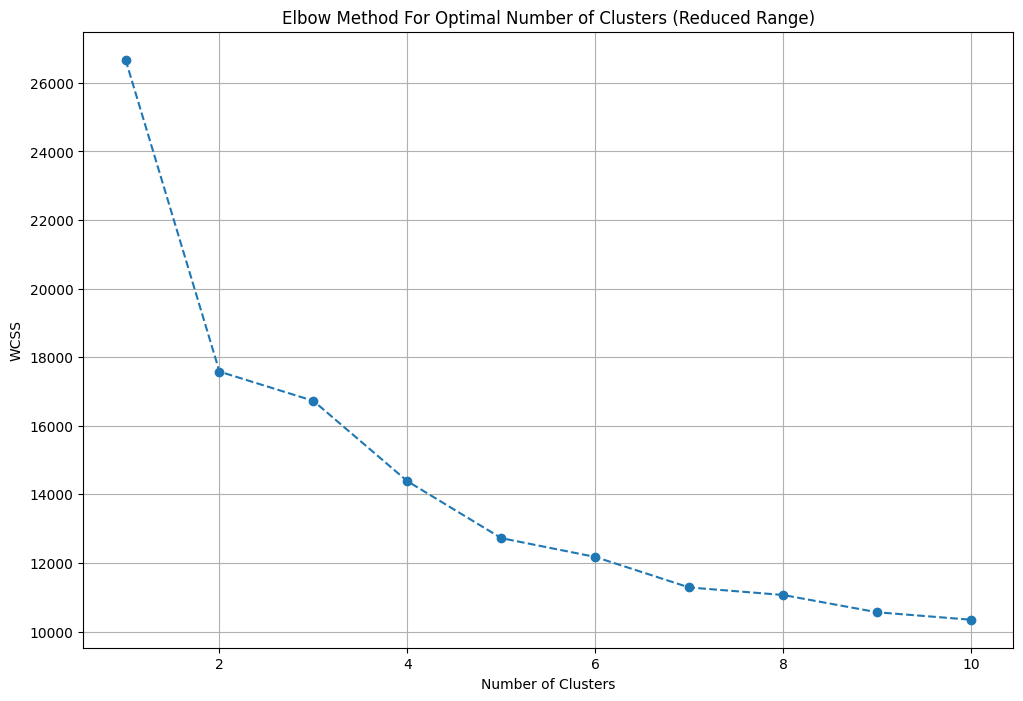

In [240]:
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [241]:
# Define the weights for each feature as provided
# Assigning weights based on perceived luxury contribution
weights = {
    '24/7 Power Backup': 8,
    '24/7 Water Supply': 4,
    '24x7 Security': 7,
    'ATM': 4,
    'Aerobics Centre': 6,
    'Airy Rooms': 8,
    'Amphitheatre': 7,
    'Badminton Court': 7,
    'Banquet Hall': 8,
    'Bar/Chill-Out Lounge': 9,
    'Barbecue': 7,
    'Basketball Court': 7,
    'Billiards': 7,
    'Bowling Alley': 8,
    'Business Lounge': 9,
    'CCTV Camera Security': 8,
    'Cafeteria': 6,
    'Car Parking': 6,
    'Card Room': 6,
    'Centrally Air Conditioned': 9,
    'Changing Area': 6,
    "Children's Play Area": 7,
    'Cigar Lounge': 9,
    'Clinic': 5,
    'Club House': 9,
    'Concierge Service': 9,
    'Conference room': 8,
    'Creche/Day care': 7,
    'Cricket Pitch': 7,
    'Doctor on Call': 6,
    'Earthquake Resistant': 5,
    'Entrance Lobby': 7,
    'False Ceiling Lighting': 6,
    'Feng Shui / Vaastu Compliant': 5,
    'Fire Fighting Systems': 8,
    'Fitness Centre / GYM': 8,
    'Flower Garden': 7,
    'Food Court': 6,
    'Foosball': 5,
    'Football': 7,
    'Fountain': 7,
    'Gated Community': 7,
    'Golf Course': 10,
    'Grocery Shop': 6,
    'Gymnasium': 8,
    'High Ceiling Height': 8,
    'High Speed Elevators': 8,
    'Infinity Pool': 9,
    'Intercom Facility': 7,
    'Internal Street Lights': 6,
    'Internet/wi-fi connectivity': 7,
    'Jacuzzi': 9,
    'Jogging Track': 7,
    'Landscape Garden': 8,
    'Laundry': 6,
    'Lawn Tennis Court': 8,
    'Library': 8,
    'Lounge': 8,
    'Low Density Society': 7,
    'Maintenance Staff': 6,
    'Manicured Garden': 7,
    'Medical Centre': 5,
    'Milk Booth': 4,
    'Mini Theatre': 9,
    'Multipurpose Court': 7,
    'Multipurpose Hall': 7,
    'Natural Light': 8,
    'Natural Pond': 7,
    'Park': 8,
    'Party Lawn': 8,
    'Piped Gas': 7,
    'Pool Table': 7,
    'Power Back up Lift': 8,
    'Private Garden / Terrace': 9,
    'Property Staff': 7,
    'RO System': 7,
    'Rain Water Harvesting': 7,
    'Reading Lounge': 8,
    'Restaurant': 8,
    'Salon': 8,
    'Sauna': 9,
    'Security / Fire Alarm': 9,
    'Security Personnel': 9,
    'Separate entry for servant room': 8,
    'Sewage Treatment Plant': 6,
    'Shopping Centre': 7,
    'Skating Rink': 7,
    'Solar Lighting': 6,
    'Solar Water Heating': 7,
    'Spa': 9,
    'Spacious Interiors': 9,
    'Squash Court': 8,
    'Steam Room': 9,
    'Sun Deck': 8,
    'Swimming Pool': 8,
    'Temple': 5,
    'Theatre': 9,
    'Toddler Pool': 7,
    'Valet Parking': 9,
    'Video Door Security': 9,
    'Visitor Parking': 7,
    'Water Softener Plant': 7,
    'Water Storage': 7,
    'Water purifier': 7,
    'Yoga/Meditation Area': 7
}
# Calculate luxury score for each row
luxury_score = features_binary_df[list(weights.keys())].multiply(list(weights.values())).sum(axis=1)


In [242]:
df['luxury_score'] = luxury_score

In [243]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,features_list,luxury_score
0,flat,experion the heartsong,sector 108,1.60,7988.0,2003.0,Super Built up area 2003(186.08 sq.m.)Built Up area: 1500.29 sq.ft. (139.38 sq.m.)Carpet area: 1140.98 sq.ft. (106 sq.m.),3,4,3+,servant room,3.0,South,Relatively New,"['Galleria 108 Mall', 'Dwarka Expressway', 'Central Peripheral Road', 'The Shikshiyan School', 'Manipal Hospital', 'Indira Gandhi International Airport', 'Vivanta New Delhi, Dwarka', 'SkyJumper Trampoline Park', 'Fun N Food Village']","['1 Wardrobe', '3 Fan', '1 Exhaust Fan', '3 Geyser', '3 Light', '4 AC', '1 Modular Kitchen', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Lift(s)', 'Maintenance Staff', 'Swimming Pool', 'Water Storage', 'Park', 'Visitor Parking', 'Fitness Centre / GYM', 'Club house / Community Center', 'Rain Water Harvesting']",2003.0,1500.29,1140.98,0,1,0,0,0,1,"[Security / Fire Alarm, Lift(s), Maintenance Staff, Swimming Pool, Water Storage, Park, Visitor Parking, Fitness Centre / GYM, Club house / Community Center, Rain Water Harvesting]",60
1,flat,emaar gurgaon greens,sector 102,1.55,9393.0,1650.0,Super Built up area 1650(153.29 sq.m.)Carpet area: 1022.58 sq.ft. (95 sq.m.),3,4,3,servant room,7.0,North,Relatively New,"['JMS Marine Square Mall', 'Dwarka Expressway', 'Basai Road', 'Prime Scholars Int. School', 'DPG Institute of Technology', 'Vibrant Hospital', 'Indira Gandhi International Airport', 'IMT Manesar', 'SkyJumper Trampoline Park', 'Ramgarh Farms & Resort']","['5 Fan', '1 Exhaust Fan', '10 Light', '5 AC', '1 Modular Kitchen', '1 Chimney', 'No Bed', 'No Curtains', 'No Dining Table', 'No Geyser', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Centrally Air Conditioned', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']",1650.0,NaN,1022.58,0,1,0,0,0,1,"[Centrally Air Conditioned, Security / Fire Alarm, Feng Shui / Vaastu Compliant, Intercom Facility, Lift(s), High Ceiling Height, Maintenance Staff, Water Storage, Separate entry for servant room, No open drainage around, Piped-gas, Internet/wi-fi connectivity, Recently Renovated, Visitor Parking, Swimming Pool, Park, Security Personnel, Natural Light, Airy Rooms, Spacious Interiors, Low Density Society, Waste Disposal, Rain Water Harvesting, Water softening plant, Shopping Centre, Fitness Centre / GYM, Club house / Community Center]",152
2,flat,sobha city,sector 108,3.75,14938.0,2510.0,Super Built up area 2343(217.67 sq.m.),3,3,2,servant room,16.0,North-East,New Property,"['Dwarka Sector 21', 'Dwarka Expressway', 'Vasant Kunj', 'The Shikshiyan School', 'The NorthCap University', 'Rions Hospital', 'IGI Airport', 'Gurgaon', 'WTC Plaza', 'Luxus Haritma Resort', 'Fun N Food WaterPark', 'BSF Golf Course', 'Nehru Stadium']","['1 Fan', '1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Intercom Facility

In [244]:
# cols to drop -> nearbyLocations,furnishDetails, features,features_list, additionalRoom
df.drop(columns=['nearbyLocations','furnishDetails','features','features_list','additionalRoom'],inplace=True)

In [245]:
df.sample(5)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2741,flat,green court,sector 90,0.40,6389.0,626.0,Super Built up area 626(58.16 sq.m.)Carpet area: 526 sq.ft. (48.87 sq.m.),2,2,1,8.0,South,New Property,626.0,NaN,526.000000,0,0,0,0,0,0,20
1303,flat,rof ananda,sector 95,0.37,5744.0,644.0,Carpet area: 644.12 (59.84 sq.m.),3,2,1,6.0,South-East,Relatively New,NaN,NaN,644.111776,0,0,0,1,0,1,72
2424,house,independent,sector 26,8.90,32963.0,2700.0,Plot area 300(250.84 sq.m.),4,4,3+,2.0,South-East,Old Property,NaN,2700.0,NaN,1,1,1,1,0,0,82
1122,flat,m3m merlin,sector 67,3.50,14583.0,2400.0,Super Built up area 2400(222.97 sq.m.)Carpet area: 2050 sq.ft. (190.45 sq.m.),3,4,3,17.0,South-East,Relatively New,2400.0,NaN,2050.000000,0,1,1,0,0,1,167
976,house,international city by sobha phase 1,sector 109,5.75,16428.0,3500.0,Plot area 272(25.27 sq.m.)Built Up area: 4800 sq.ft. (445.93 sq.m.)Carpet area: 3500 sq.ft. (325.16 sq.m.),4,4,2,3.0,South-East,Relatively New,NaN,4800.0,3500.000000,0,1,0,0,0,0,146


In [246]:
df.shape

(3803, 23)

In [247]:
df.to_csv('gurgaon_properties_cleaned_v2.csv',index=False)